# 1- Setup
## Importing libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import matplotlib

In [33]:
clf = RandomForestClassifier(random_state = 0, n_estimators = 15)
loo = LeaveOneOut()
le = preprocessing.LabelEncoder()
treereg = DecisionTreeRegressor(random_state = 0)
rf = RandomForestRegressor(random_state = 0, max_depth= 1)


In [3]:
df = pd.read_csv('./IonicLiquids_FullDataset.csv')

# 2- Analysis of Dataset
## Finding Correlations
In the correlation matrix below, only the descriptors and target varibales from the original dataset (listed in the cell below) were used. Non-numeric entries were removed!

<AxesSubplot:title={'center':'Correlation Heatmap (n=12)'}>

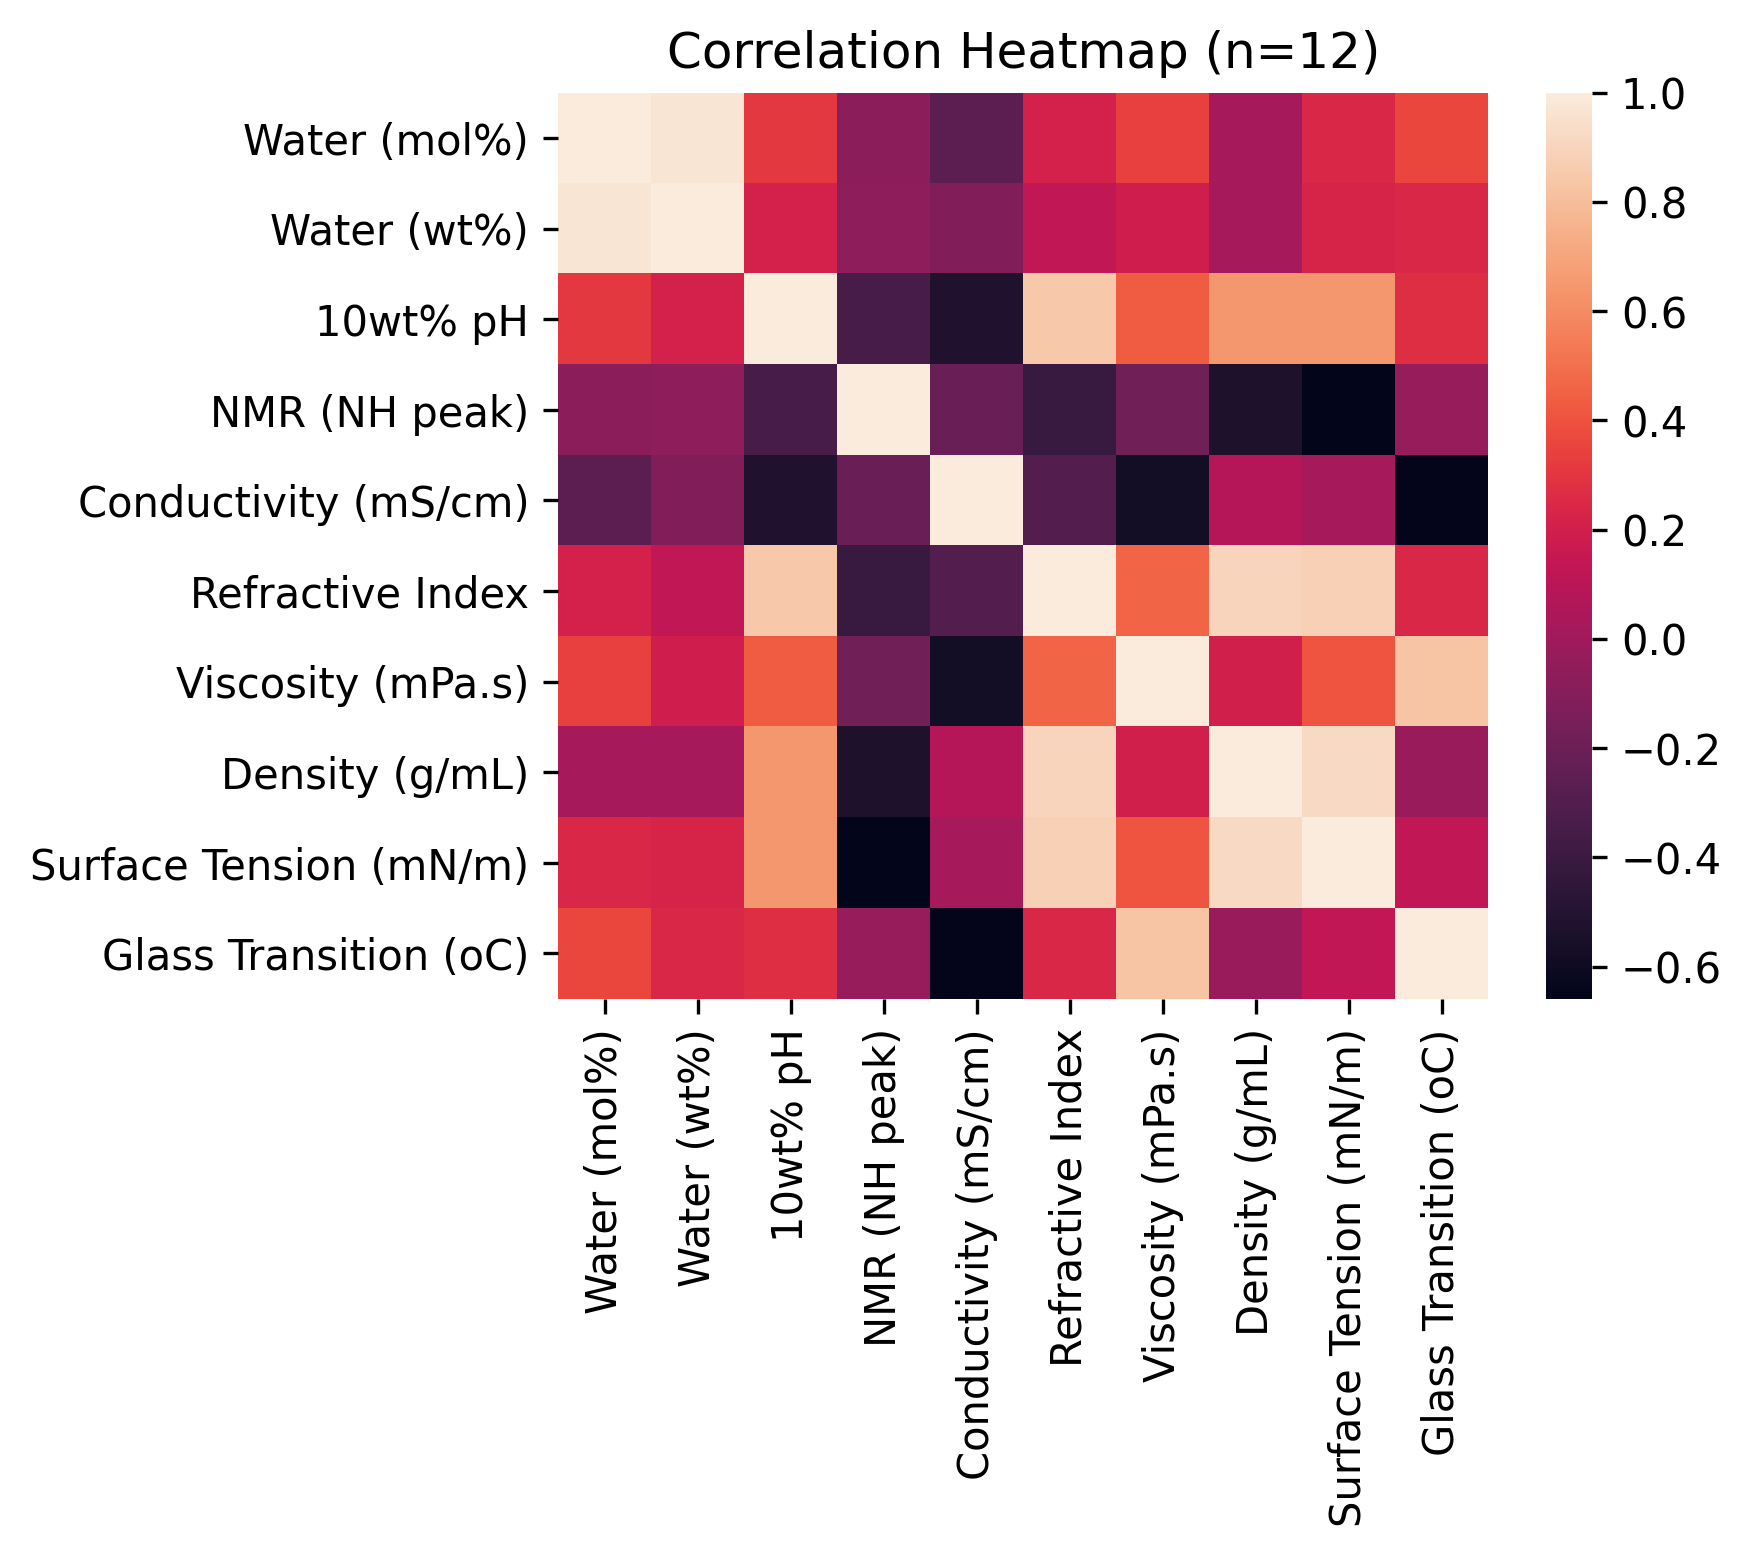

In [4]:
descriptors_for_corr = ['Water (mol%)','Water (wt%)', '10wt% pH', 'NMR (NH peak)', 'Conductivity (mS/cm)','Refractive Index', 'Viscosity (mPa.s)', 'Density (g/mL)','Surface Tension (mN/m)','Glass Transition (oC)']
corr_df = df[:]
corr_df = corr_df[descriptors_for_corr]
for var in descriptors_for_corr:
    corr_df = corr_df[pd.to_numeric(corr_df[var],errors='coerce').notna()]
corr_df = corr_df.reset_index()
corr_df = corr_df[descriptors_for_corr]

#The following loop was added du to the correlation matrix losing columns as a result of the data format
for column in corr_df.columns:
    formatted = [float(i) for i in corr_df[column]]
    corr_df[column] =formatted

plt.figure(figsize=(5,4), dpi = 300)
plt.title(f"Correlation Heatmap (n={len(corr_df)})")
sns.heatmap(corr_df.corr())    

<AxesSubplot:title={'center':'Absolute Value of Correlation Heatmap (n=12)'}>

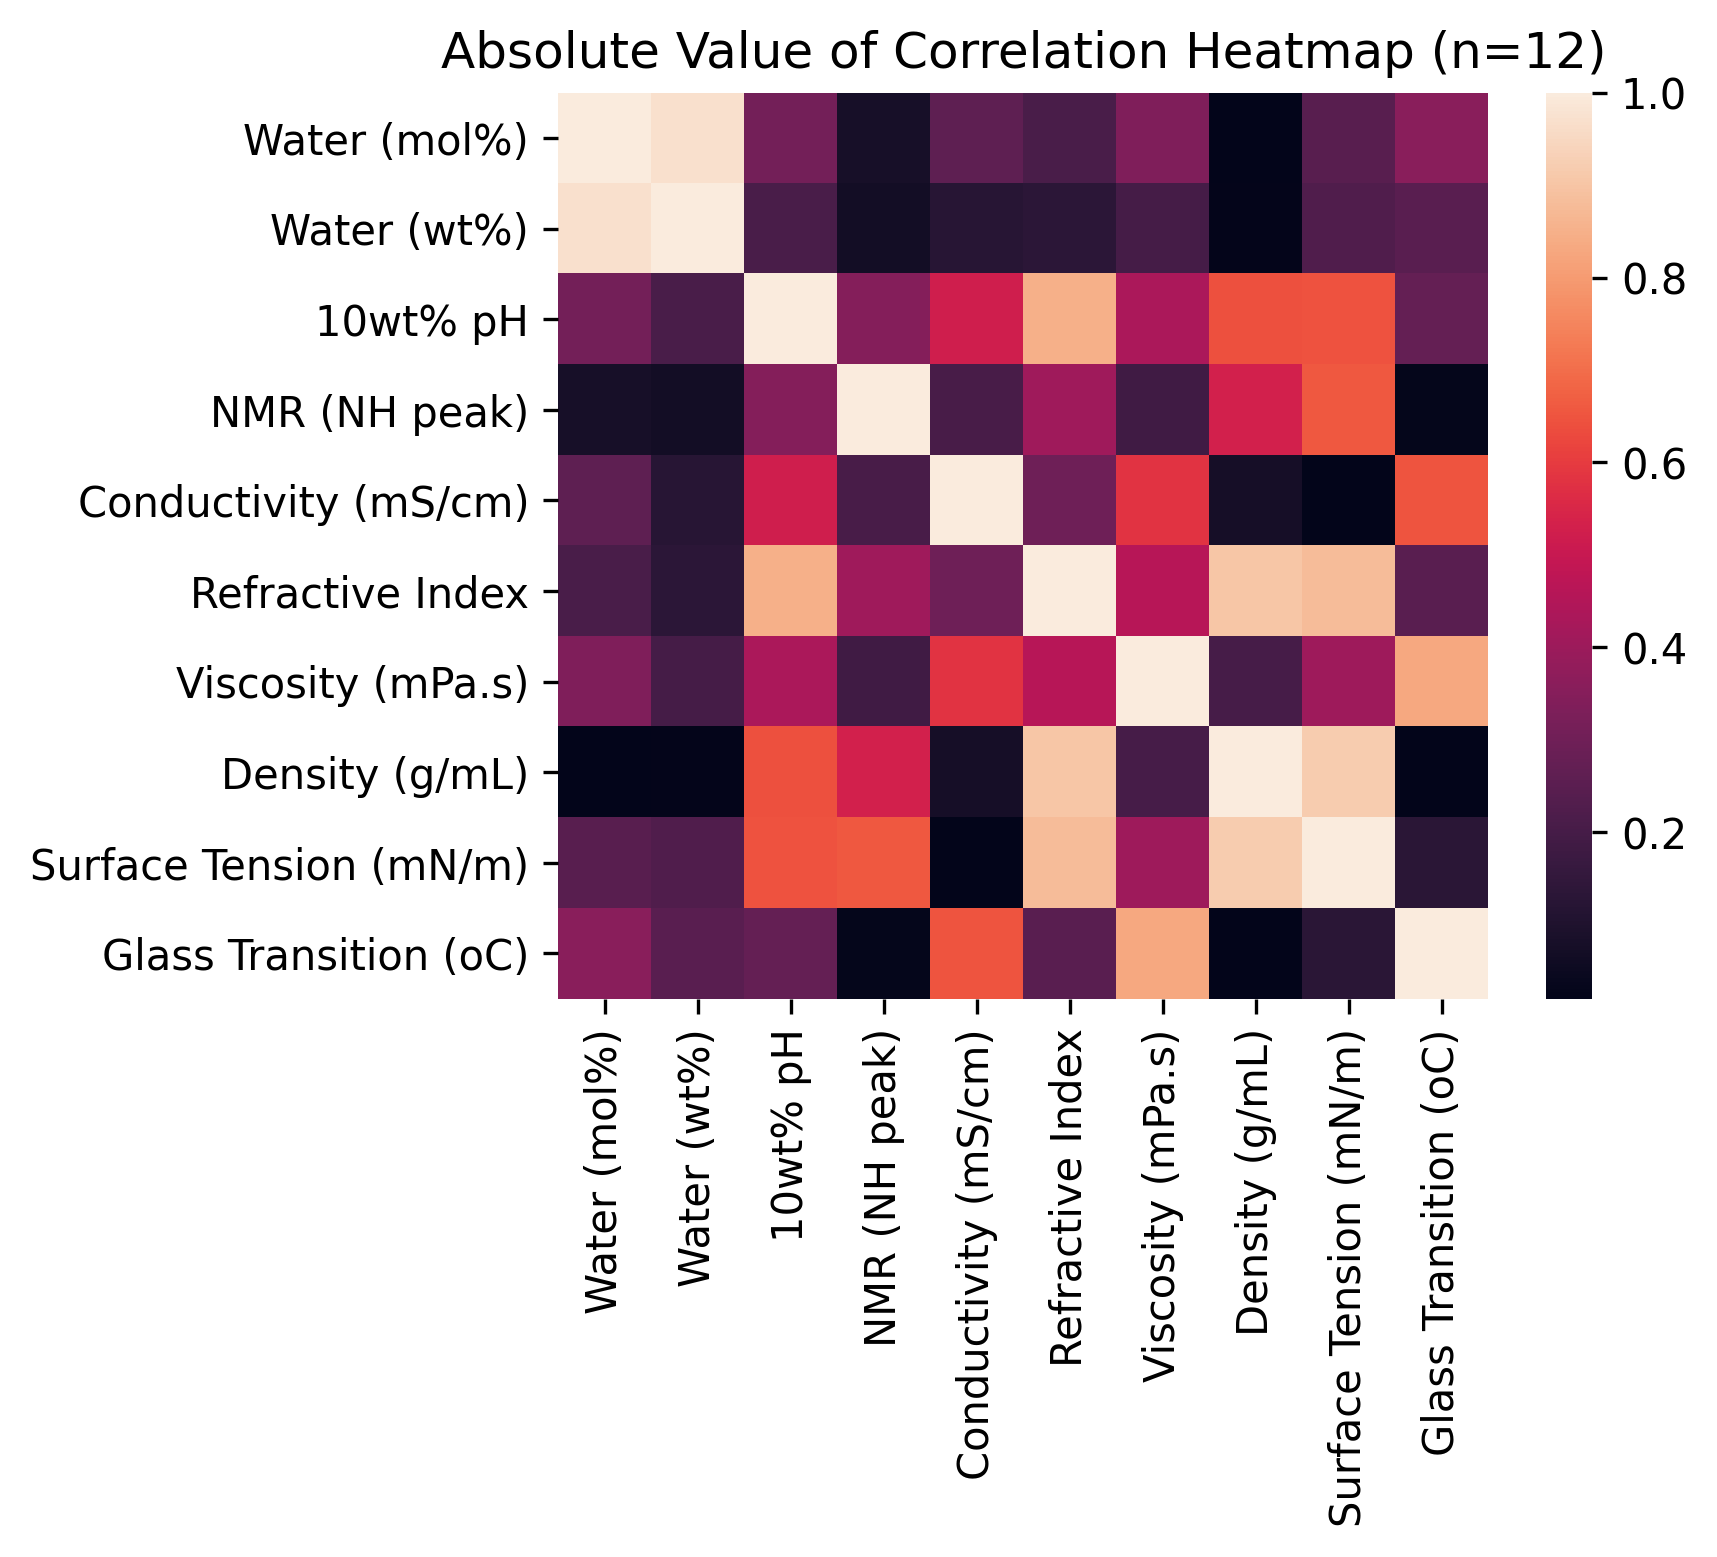

In [5]:
plt.figure(figsize=(5,4), dpi = 300)
plt.title(f"Absolute Value of Correlation Heatmap (n={len(corr_df)})")
sns.heatmap(corr_df.corr().abs())

## Decision Boundary Trends (Liquid/Solid Classification)
The following cell shows the human-obervable trends that were discovered within the dataset. These were discovered using 5-nearest neighbors to assign classifications to the search space. By painting the different classification regions different colors, the decision boundaries for the fauture-pair-trained kNN models can be observed.

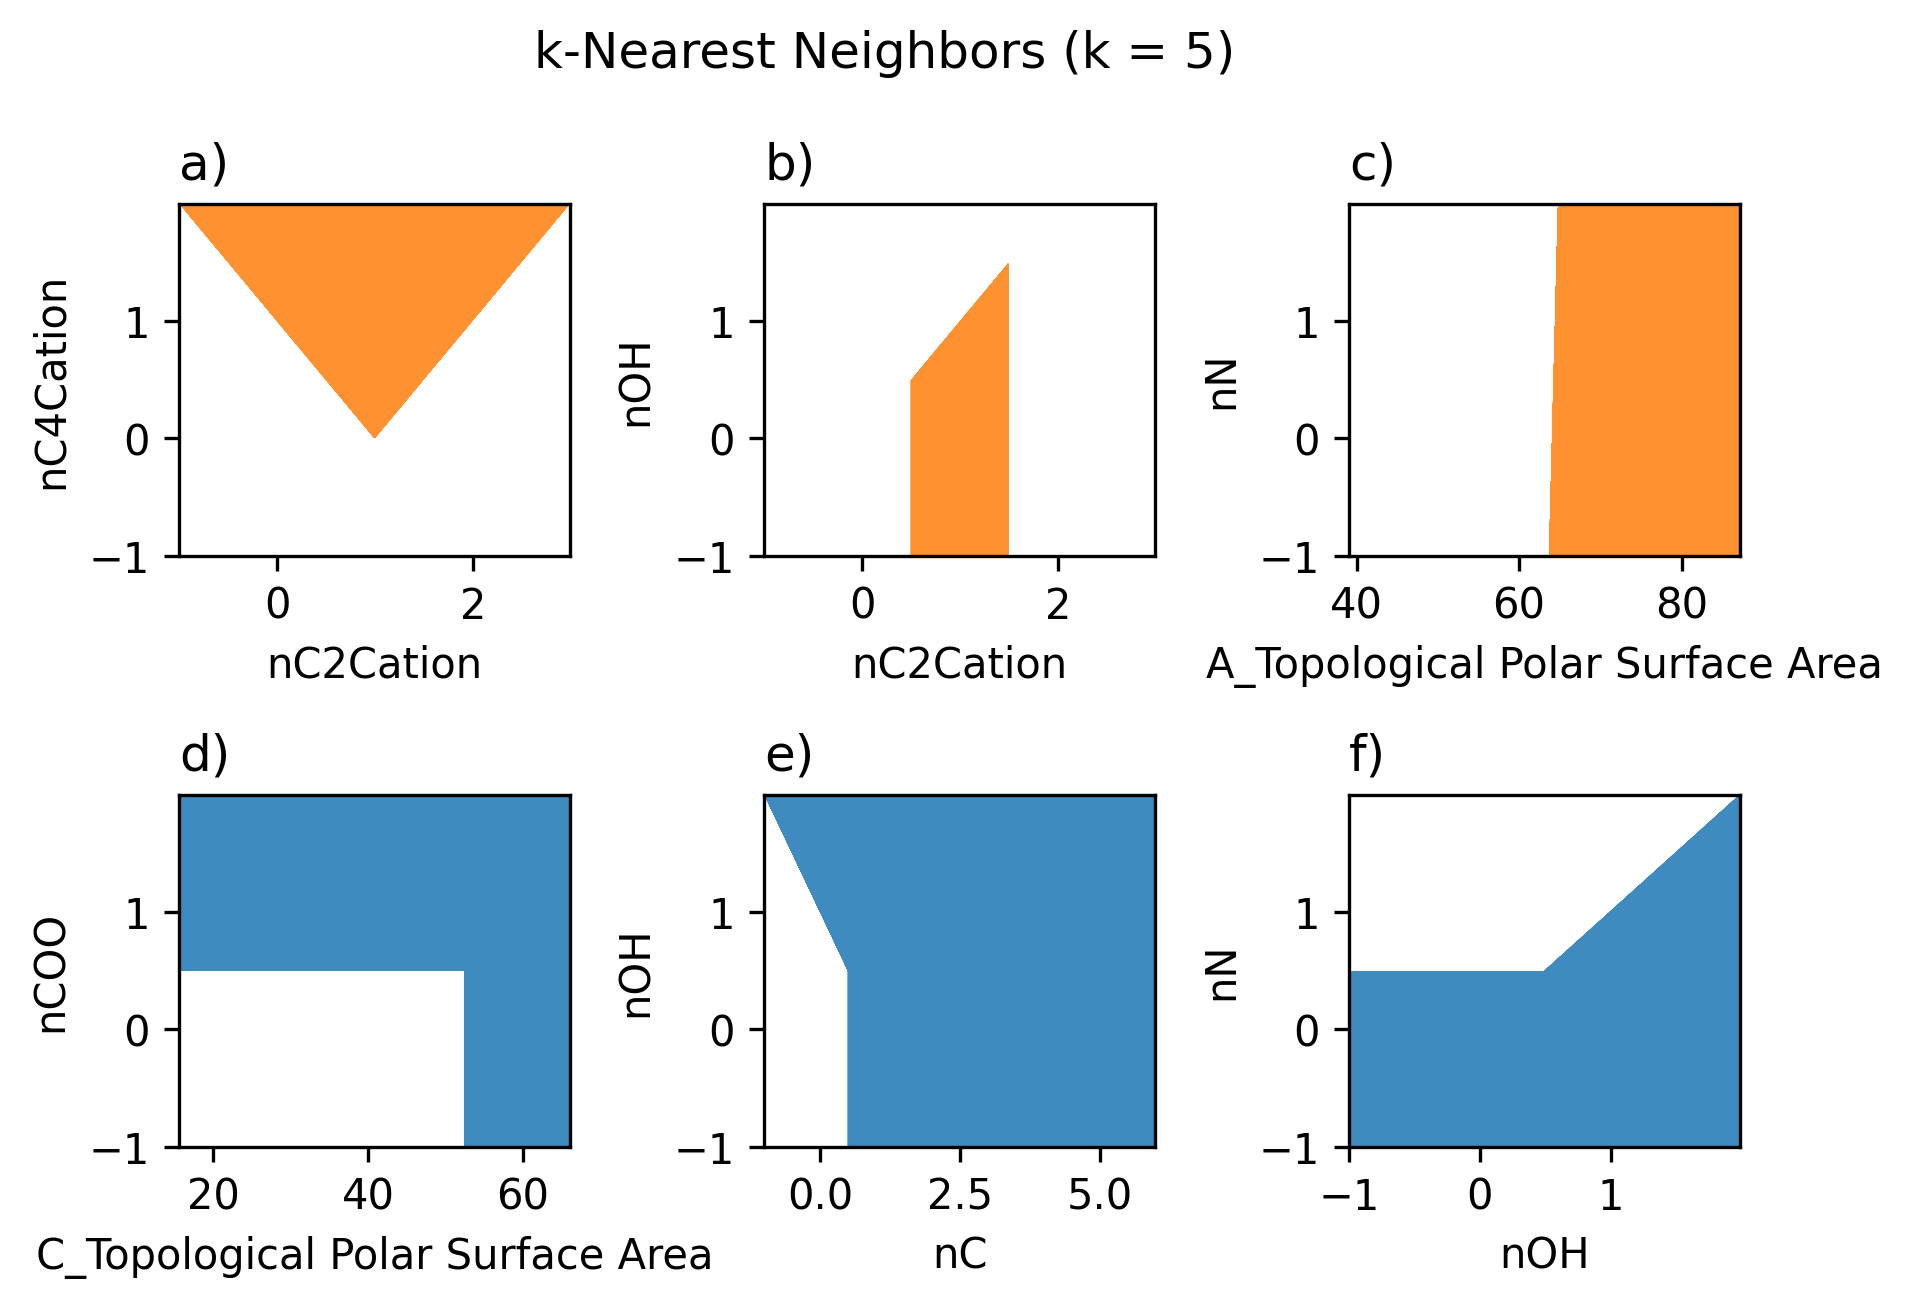

In [20]:
neighbor_count = 5


knn = KNeighborsClassifier(n_neighbors=neighbor_count)
descriptors_used = ['Water (mol%)', 'Water (wt%)','C_Molecular Weight','C_Topological Polar Surface Area','C_Heavy Atom Count', 'A_Molecular Weight','A_Topological Polar Surface Area','A_Heavy Atom Count', 'nC1Cation', 'nC2Cation', 'nC3Cation','nC4Cation', 'nOHCation', 'nN', 'nS', 'nP', 'nCl', 'nF', 'nCOO', 'nC','nOH','Surface_Area_Sum']

X_i  = df.loc[0:,descriptors_used]
y  = le.fit_transform(df['Solid/Liquid'])
X_i['Solid/Liquid'] = y
num = 0

#pairs of descriptors that show human-observable trends
pairs = [['nC4Cation','nC2Cation'],['nOH','nC2Cation'],
        ['nN','A_Topological Polar Surface Area']]



fig = plt.figure(dpi= 300, figsize = (6,4.4))
axs = fig.subplots(2,3)
for pair in pairs:
    row = num//3
    col = num%3
    ax = axs[row][col]
    letter = chr(num + 97)
    col1, col2 = pair[1], pair[0]



    X = X_i[[col1, col2]]
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1


    ax.set_title(f"{letter})", loc = 'left')

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["white","white","tab:orange"])
    #cmap = plt.cm.RdYlBu
    plot_step = 0.01 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    knn.fit(X,y)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z,cmap=cmap)

    num +=1

pairs = [['nCOO','C_Topological Polar Surface Area'],
        ['nOH','nC'],['nN', 'nOH']]#['Solid/Liquid', 'A_Topological Polar Surface Area']]
y  = le.fit_transform(df['HasGlassTransition'])
for pair in pairs:
    row = num//3
    col = num%3
    ax = axs[row][col]
    letter = chr(num + 97)
    col1, col2 = pair[1], pair[0]



    X = X_i[[col1, col2]]
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1


    ax.set_title(f"{letter})", loc = 'left')

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["white","white","tab:blue"])
    #cmap = plt.cm.RdYlBu
    plot_step = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    knn.fit(X,y)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z,cmap=cmap)

    num +=1

fig.suptitle(f'k-Nearest Neighbors (k = {neighbor_count})')
plt.tight_layout()
plt.show()

# 3- Machine Learning
When regression predictions had been tested, low r2 values were being obtained. Instead, the ML algorithms will be used to gain insight on how the models as trained (which descriptors carry the most significance), and to make classification predictions. 

## Feat Importance (RF Classifier)

In [77]:
descriptors_used = ['Water (mol%)', 'Water (wt%)','C_Molecular Weight',  'C_Topological Polar Surface Area',  'C_Heavy Atom Count', 'A_Molecular Weight',  'A_Topological Polar Surface Area',  'A_Heavy Atom Count', 'nC1Cation', 'nC2Cation', 'nC3Cation',  'nC4Cation', 'nOHCation', 'nN', 'nS', 'nP', 'nCl', 'nF', 'nCOO', 'nC',  'nOH',  'Surface_Area_Sum']
target_variables = ['Solid/Liquid', 'HasGlassTransition']
importances = {}

for target in target_variables: 
    print(target)
    current_df = df[:]
    current_df = current_df.reset_index()
    X  = current_df.loc[:,descriptors_used]
    y  = current_df.loc[:,target]
    title = f'Decision Tree Regression: {target}'
    clf.fit(X, y)
    importances[target] = clf.feature_importances_

Solid/Liquid
HasGlassTransition


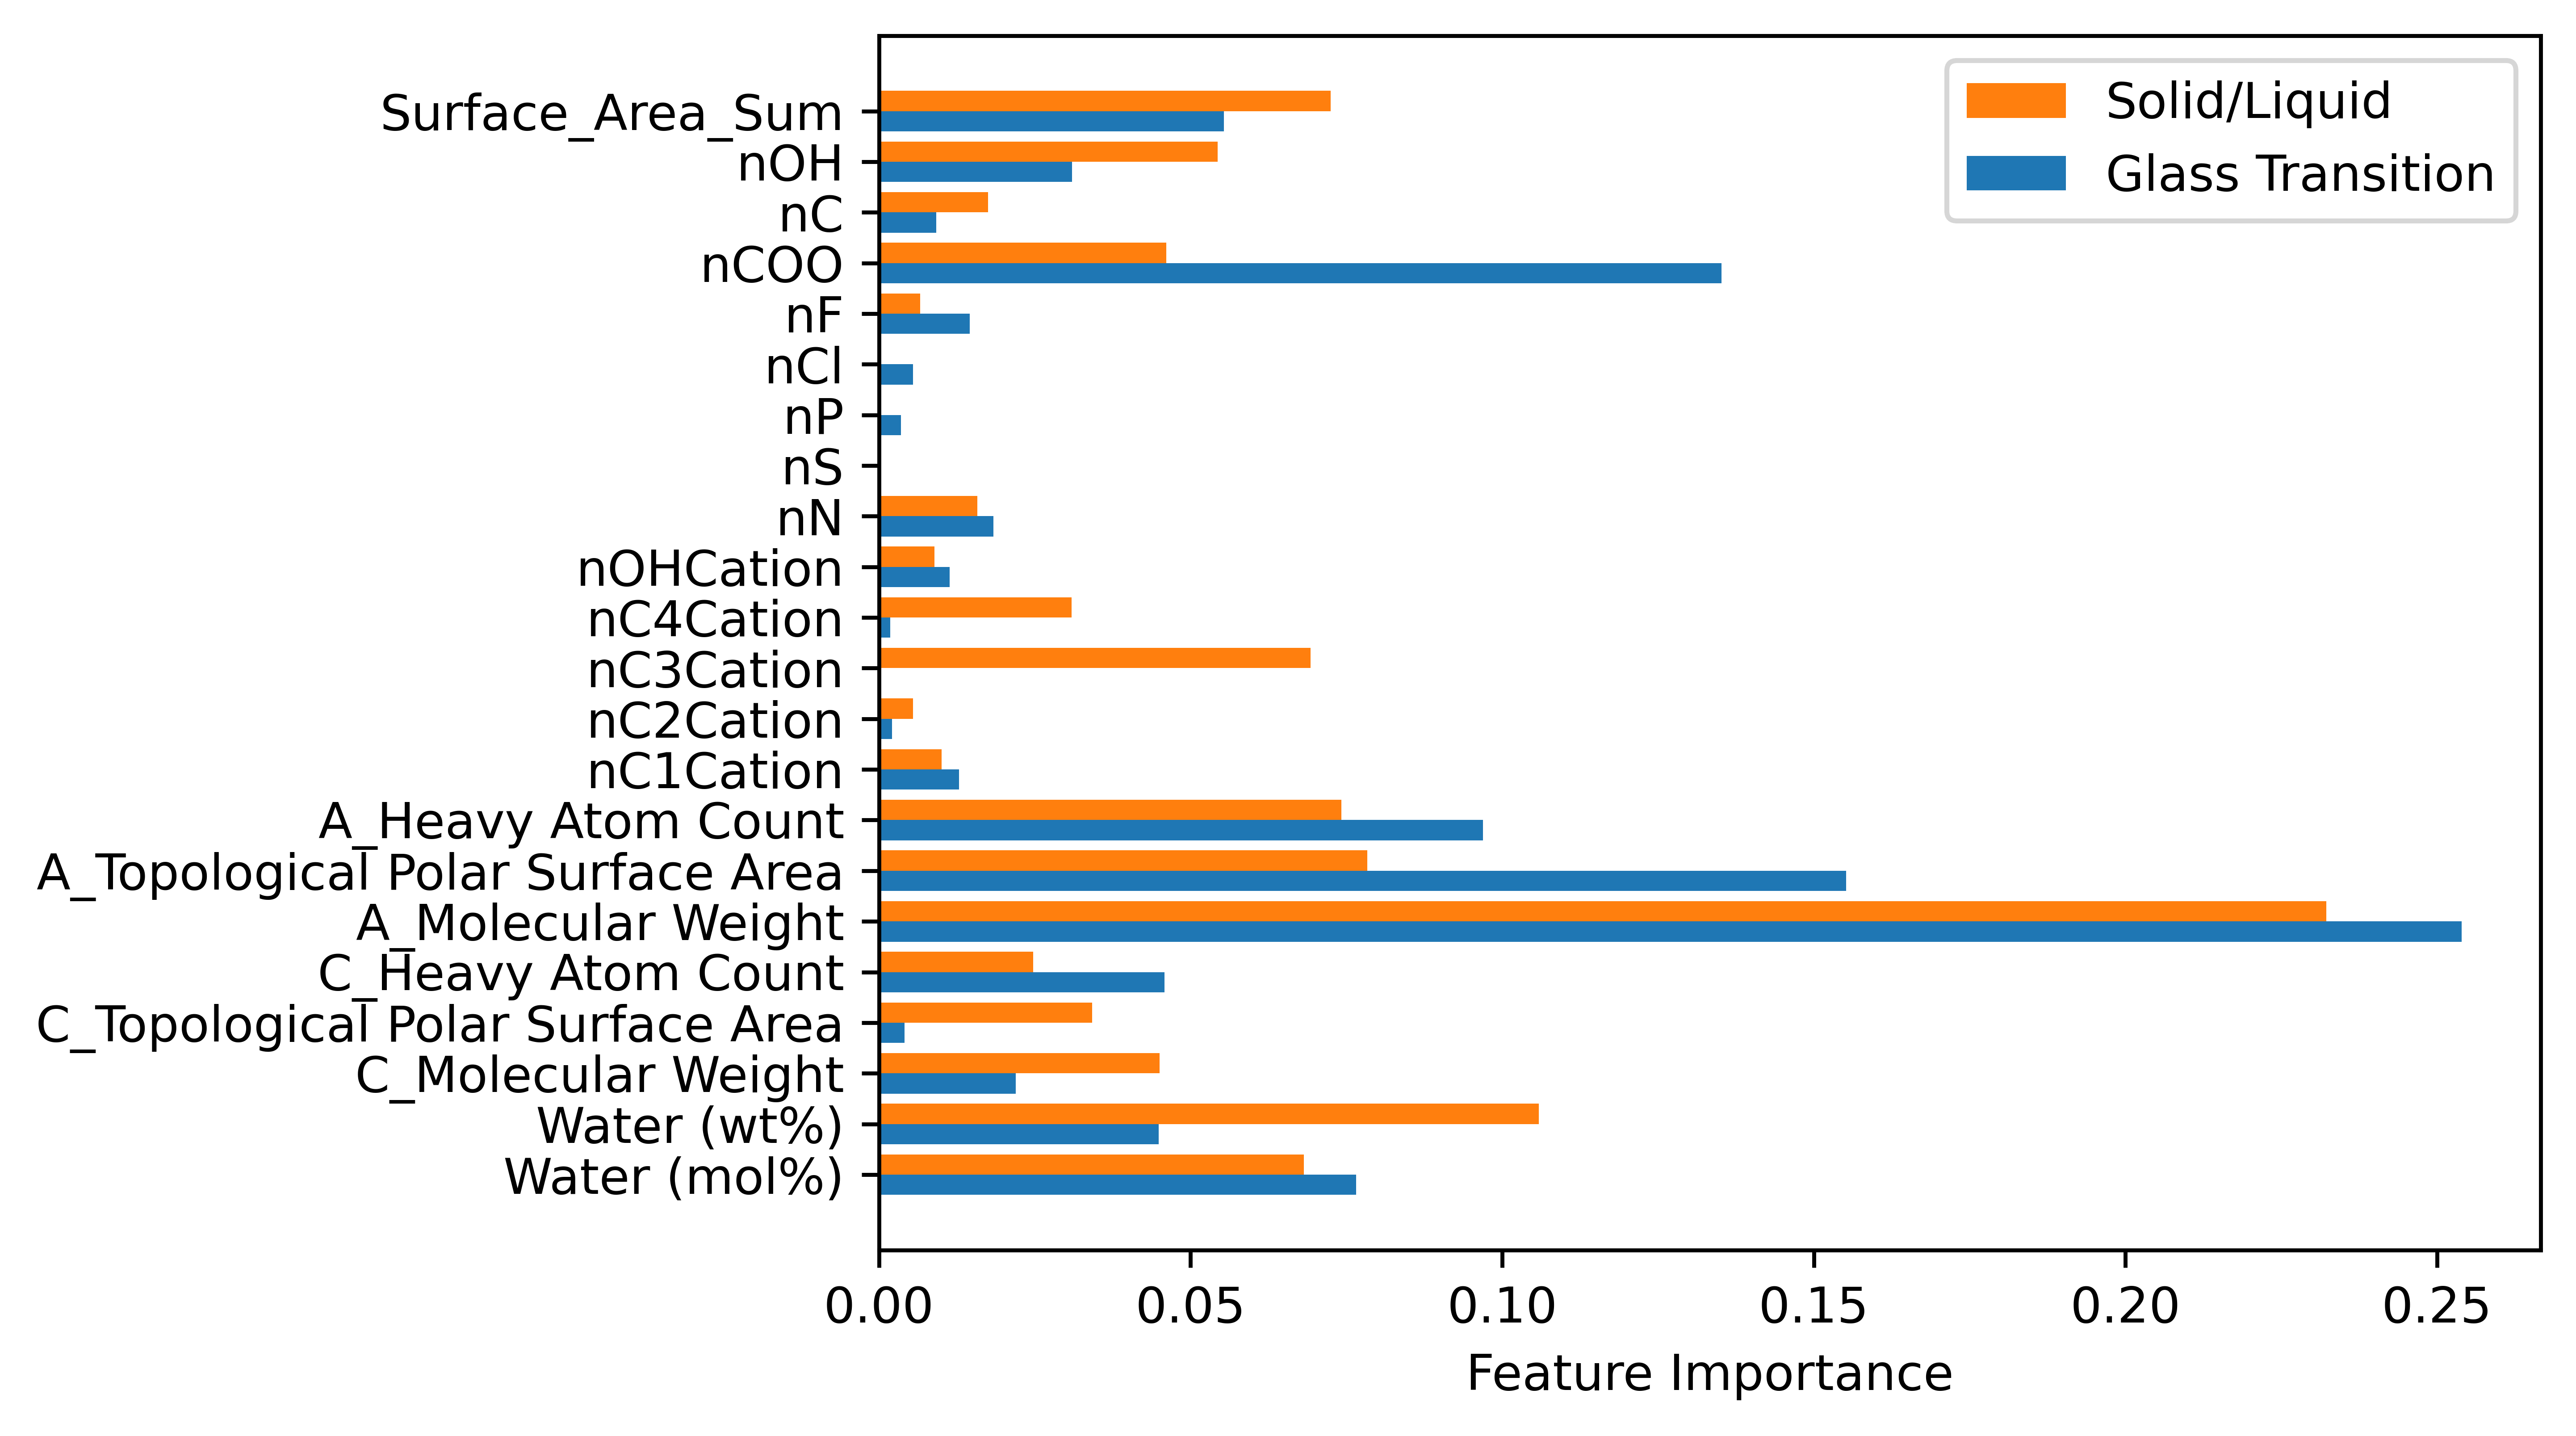

In [98]:
fig = plt.figure(dpi = 800, figsize = (6,4.5))
plt.barh([i + 0.2 for i in range(len(descriptors_used))],importances['Solid/Liquid'], height = 0.4, color= 'tab:orange', label = "Solid/Liquid") #xerr= [min_delt, max_delt]
plt.barh([i - 0.2 for i in range(len(descriptors_used))],importances['HasGlassTransition'], height = 0.4, color= 'tab:blue', label = "Glass Transition") #xerr= [min_delt, max_delt]

plt.yticks(list(range(len(indices))), indices)
plt.xlabel('Feature Importance')
plt.legend()

## Classification Predictions (Using Random Forests)

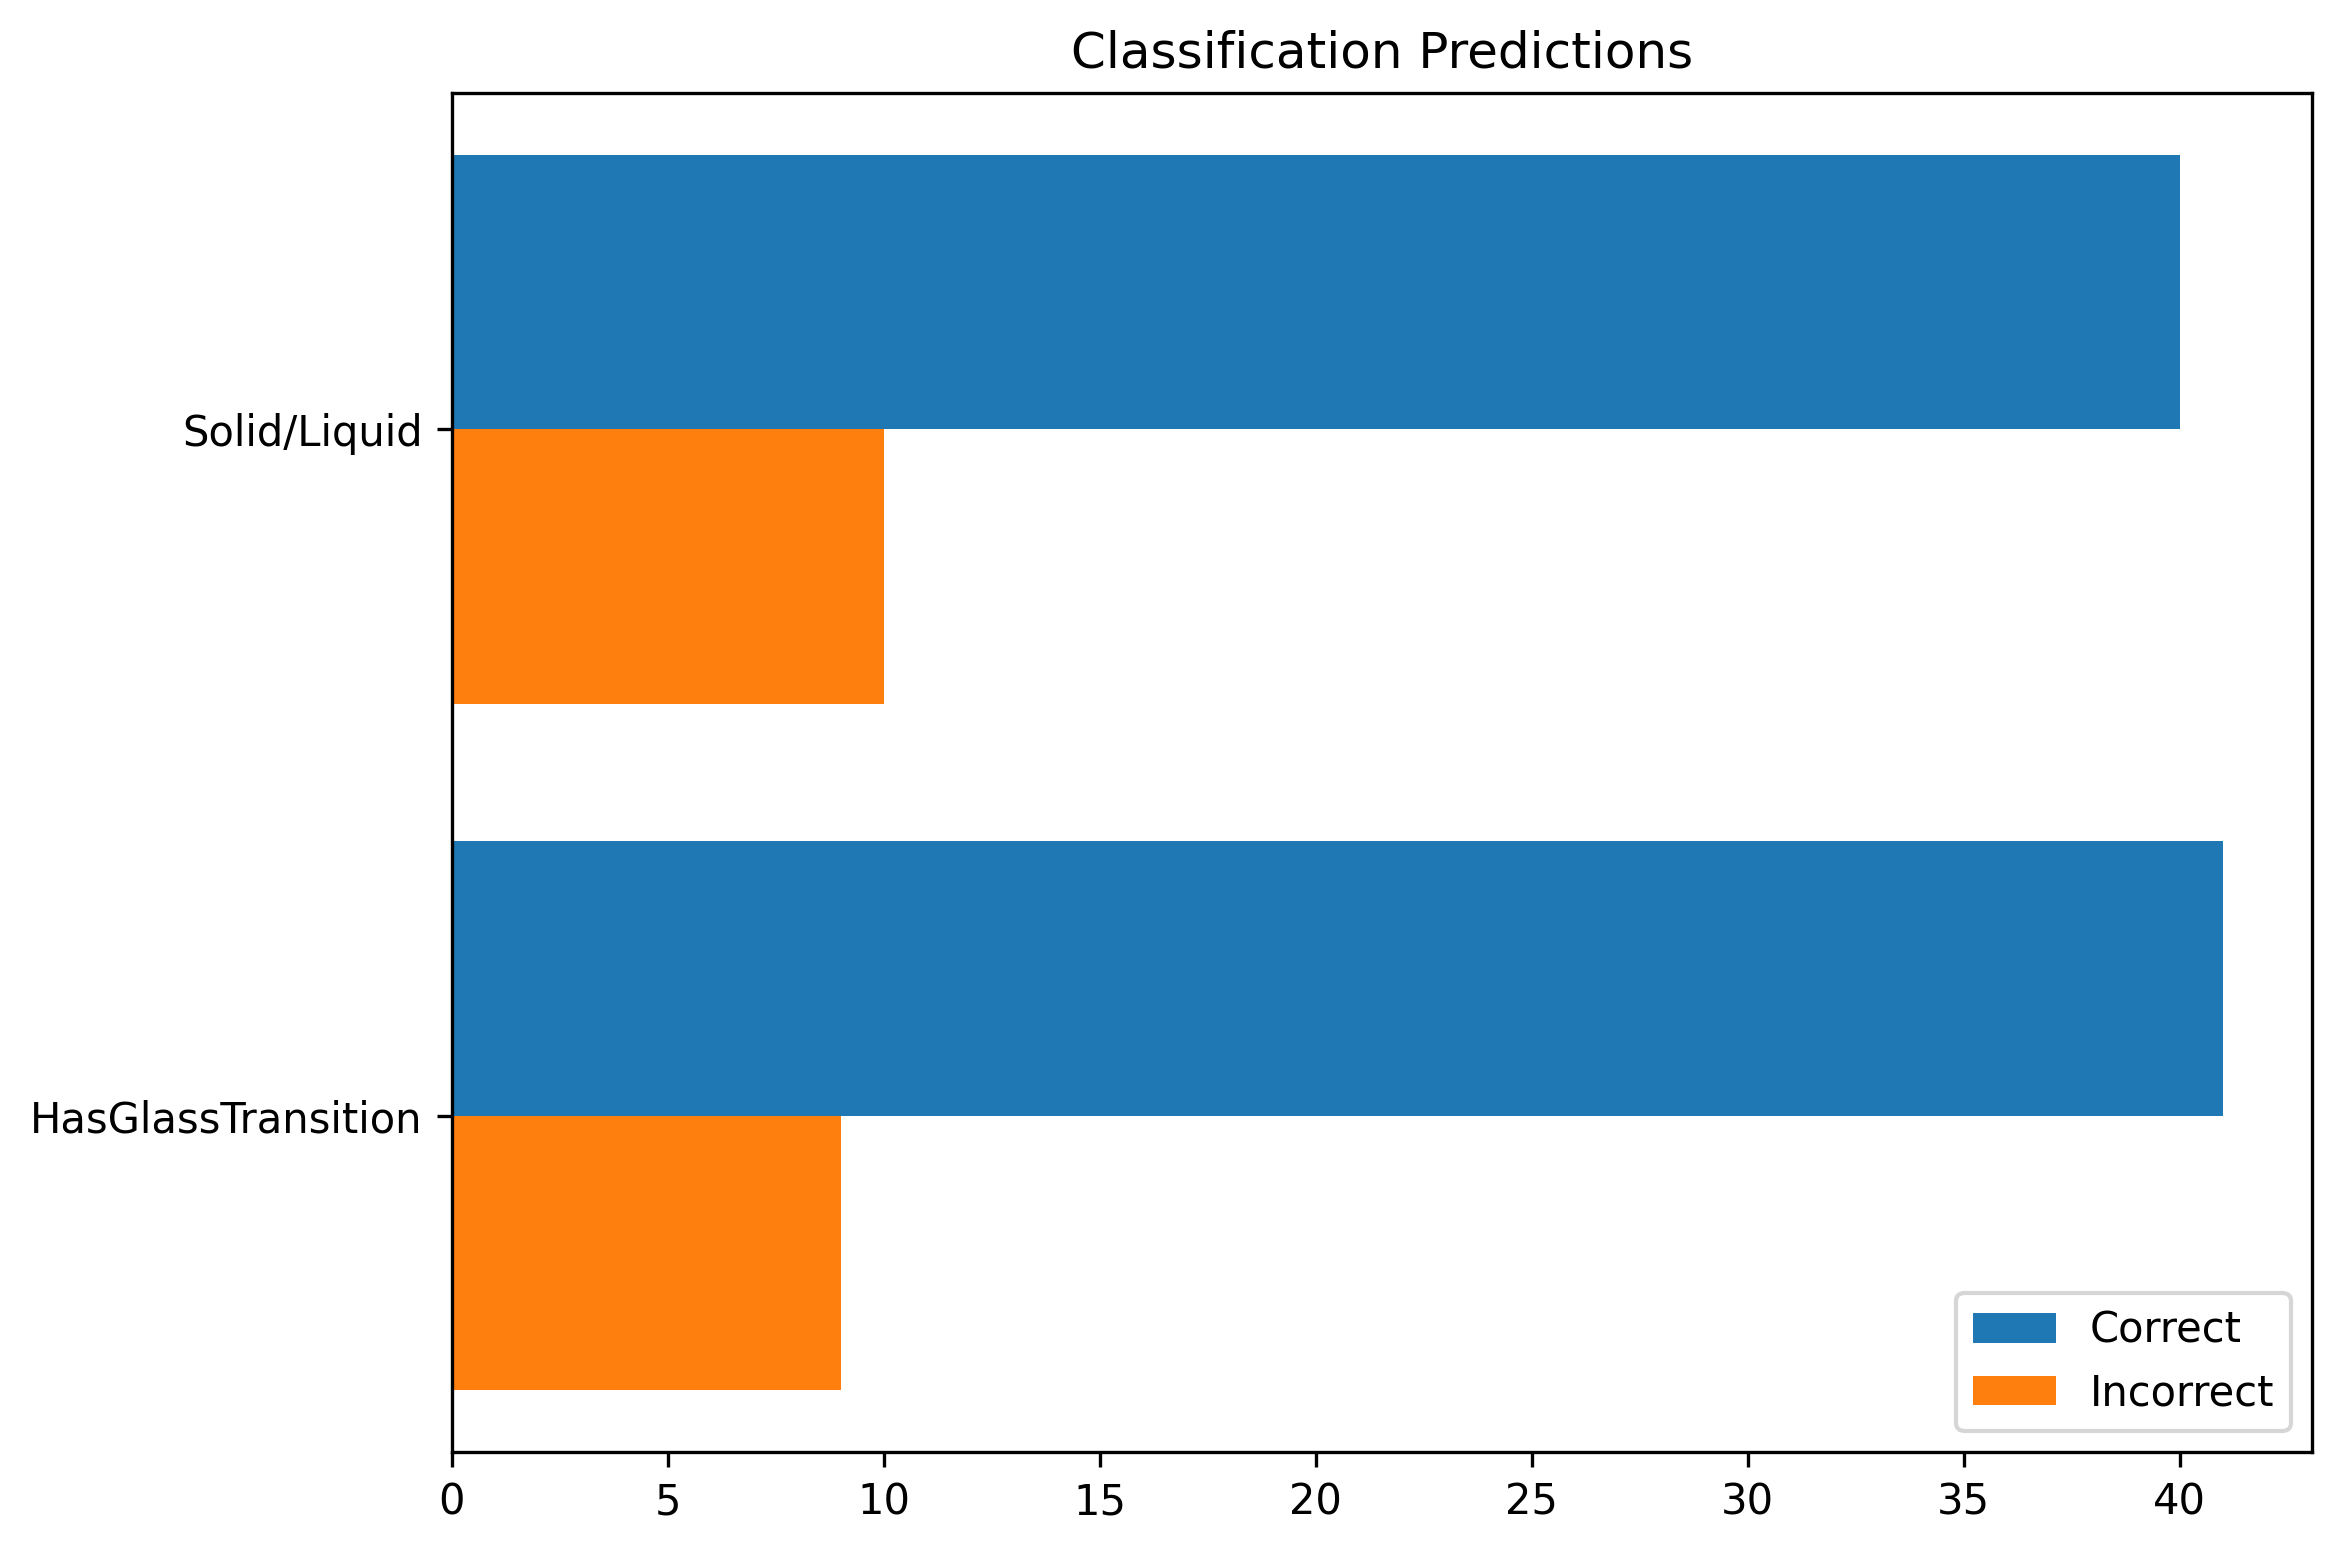

In [52]:
targets = ["HasGlassTransition",'Solid/Liquid']
#target = targets[0]
predictions = {}
true_values = {}
original_descriptors = ['Cation', 'Anion', 'Water (mol%)', 'Water (wt%)', '10wt% pH']
descriptors_used = ['Water (mol%)', 'Water (wt%)','C_Molecular Weight', 'C_Topological Polar Surface Area', 'C_Heavy Atom Count', 'A_Molecular Weight', 'A_Topological Polar Surface Area', 'A_Heavy Atom Count', 'nC1Cation', 'nC2Cation', 'nC3Cation', 'nC4Cation', 'nOHCation', 'nN', 'nS', 'nP', 'nCl', 'nF', 'nCOO', 'nC', 'nOH', 'Surface_Area_Sum']

X  = df.loc[0:,descriptors_used]

predictions = {i:[] for i in targets}
true_values = {i:[] for i in targets}


for target in targets:
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.loc[train_index,descriptors_used], X.loc[test_index,descriptors_used]
        y_train = df.loc[train_index,target]
        y_test = df.loc[test_index,target]
        clf.fit(X_train,y_train)
        predictions[target].append(clf.predict(X_test))
        true_values[target].append(y_test)

ticks = []
correct_classification_count   = []
incorrect_classification_count = []

for i in predictions:
    correct, incorrect = 0,0
    ticks.append(i)
    for j in range(len(predictions[i])):
        predicted , actual = np.array( predictions[i][j])[0], np.array(true_values[i][j])[0] #the zero indexer is added due to predicted, actual being numpy array objects
        if predicted == actual : 
            correct +=1 
        else:
            incorrect +=1
    correct_classification_count.append(correct)
    incorrect_classification_count.append(incorrect)


plt.figure(figsize = (8,6), dpi= 300)
plt.title("Classification Predictions")
xlocs1, xlocs2, xlocs = [i + 0.2 for i in range(len(ticks))],[i - 0.2 for i in range(len(ticks))],[i for i in range(len(ticks))]
plt.barh(xlocs1,correct_classification_count, height=0.4)
plt.barh(xlocs2,incorrect_classification_count, height=0.4)
plt.yticks(xlocs,ticks)
plt.legend(['Correct','Incorrect'])